In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
heart_data=pd.read_csv(r"heart.csv")

In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
#For checking the duplicates
heart_data[heart_data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
heart_data.drop_duplicates(keep='first',inplace=True)

In [7]:
heart_data.shape

(302, 14)

In [8]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
heart_data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


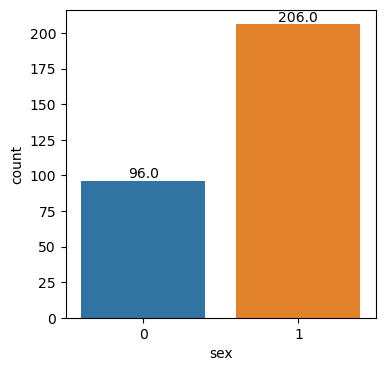

In [10]:
plt.figure(figsize=(4,4))
ax=sns.countplot(data=heart_data, x='sex')
for p in ax.patches:
    count=p.get_height()
    x_loc=p.get_x()+p.get_width()/2
    y_loc=p.get_height()
    ax.text(x_loc,y_loc,count,ha='center',va='bottom')
plt.show()

In [11]:
heart_data.head(23)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [12]:
x=heart_data.drop(columns=['output'])
y=heart_data['output']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=12)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(211, 13)
(91, 13)
(211,)
(91,)


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [20]:
heart_data.output.value_counts()

1    164
0    138
Name: output, dtype: int64

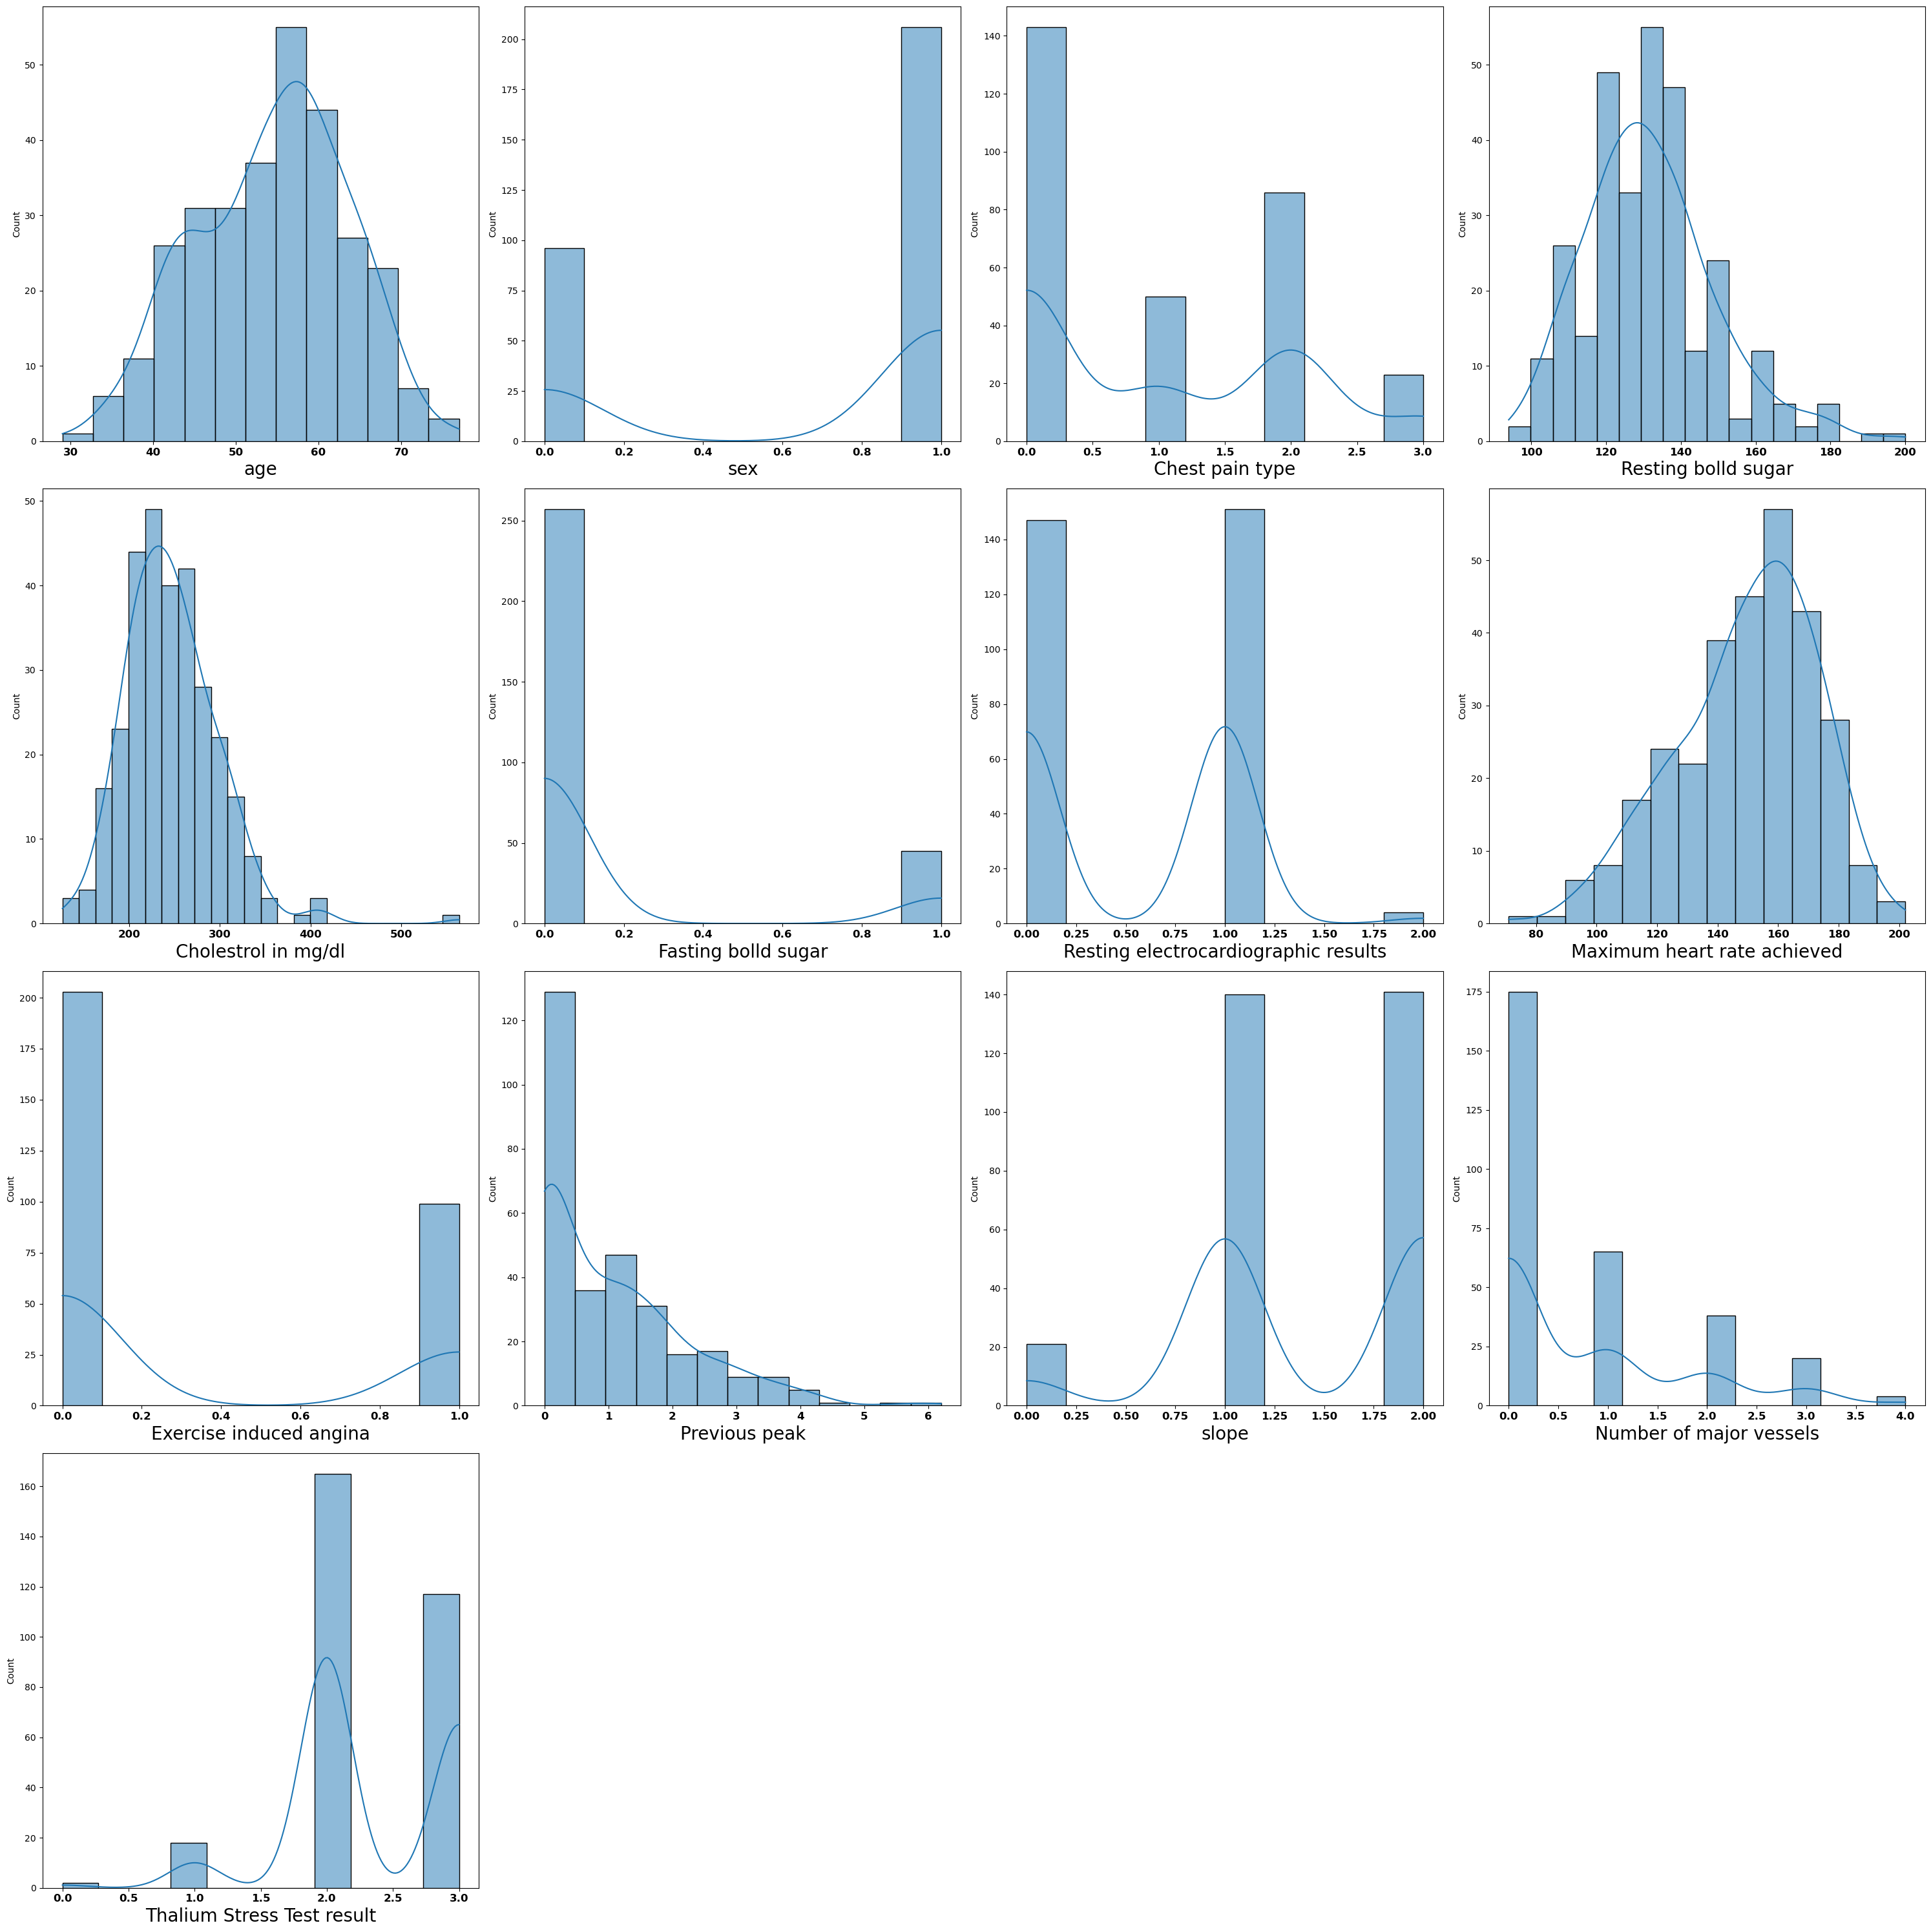

In [28]:
plt.figure(figsize=(30,30))
plotnumber=1

for column in heart_data.columns:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.histplot(heart_data[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.xticks(fontsize=12,fontweight='bold')
    plotnumber=plotnumber+1
plt.tight_layout()
plt.show()

In [25]:
heart_data.rename(columns={'cp':'Chest pain type','trtbps':'Resting bolld sugar','chol':'Cholestrol in mg/dl',
                          'fbs':'Fasting bolld sugar','restecg':'Resting electrocardiographic results',
                          'thalachh':'Maximum heart rate achieved','oldpeak':'Previous peak',
                          'slp':'slope','caa':'Number of major vessels','thall':'Thalium Stress Test result',
                          'exng':'Exercise induced angina'},inplace=True)

In [26]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   302 non-null    int64  
 1   sex                                   302 non-null    int64  
 2   Chest pain type                       302 non-null    int64  
 3   Resting bolld sugar                   302 non-null    int64  
 4   Cholestrol in mg/dl                   302 non-null    int64  
 5   Fasting bolld sugar                   302 non-null    int64  
 6   Resting electrocardiographic results  302 non-null    int64  
 7   Maximum heart rate achieved           302 non-null    int64  
 8   Exercise induced angina               302 non-null    int64  
 9   Previous peak                         302 non-null    float64
 10  slope                                 302 non-null    int64  
 11  Number of major ves

In [29]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [30]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred=log_reg.predict(x_test)

In [32]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8461538461538461

In [33]:
y_test.value_counts()

1    46
0    45
Name: output, dtype: int64

In [34]:
conf_mat = confusion_matrix(y_test,y_pred,labels=[1,0])
conf_mat

array([[39,  7],
       [ 7, 38]], dtype=int64)

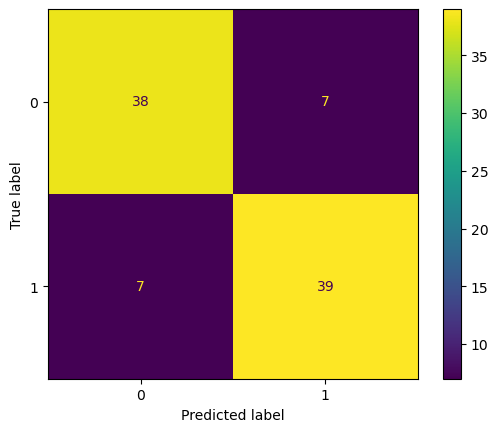

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [36]:
conf_mat

array([[39,  7],
       [ 7, 38]], dtype=int64)

In [37]:
true_positive=conf_mat[0][0]
false_negative=conf_mat[0][1]
false_positive=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [38]:
Accuracy=(true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
Accuracy

0.8461538461538461

In [39]:
Precision=true_positive/(true_positive+false_positive)
Precision

0.8478260869565217

In [40]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.8478260869565217

In [41]:
f1=2*((Precision*Recall))/(Precision+Recall)
f1

0.8478260869565218

In [44]:
from sklearn.metrics import roc_curve

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.8461352657004831

In [57]:
y_test_prob=log_reg.predict_proba(x_test)
y_test_prob

array([[3.52218578e-01, 6.47781422e-01],
       [8.86208073e-02, 9.11379193e-01],
       [7.26948775e-02, 9.27305123e-01],
       [7.30676646e-01, 2.69323354e-01],
       [9.92653879e-01, 7.34612127e-03],
       [1.33101410e-01, 8.66898590e-01],
       [3.50276089e-01, 6.49723911e-01],
       [9.68365607e-01, 3.16343931e-02],
       [9.94002723e-01, 5.99727713e-03],
       [9.56468860e-01, 4.35311399e-02],
       [1.69717265e-01, 8.30282735e-01],
       [9.34009852e-01, 6.59901482e-02],
       [9.62468680e-01, 3.75313201e-02],
       [5.42456104e-01, 4.57543896e-01],
       [6.55955163e-01, 3.44044837e-01],
       [9.95655042e-01, 4.34495833e-03],
       [1.24434956e-01, 8.75565044e-01],
       [6.18877475e-01, 3.81122525e-01],
       [6.28711126e-02, 9.37128887e-01],
       [8.53091776e-01, 1.46908224e-01],
       [5.34893671e-01, 4.65106329e-01],
       [9.61668835e-01, 3.83311652e-02],
       [3.93393187e-02, 9.60660681e-01],
       [9.53990462e-01, 4.60095384e-02],
       [1.282070

In [49]:
y_test_prob[:,1]

array([6.47781422e-01, 9.11379193e-01, 9.27305123e-01, 2.69323354e-01,
       7.34612127e-03, 8.66898590e-01, 6.49723911e-01, 3.16343931e-02,
       5.99727713e-03, 4.35311399e-02, 8.30282735e-01, 6.59901482e-02,
       3.75313201e-02, 4.57543896e-01, 3.44044837e-01, 4.34495833e-03,
       8.75565044e-01, 3.81122525e-01, 9.37128887e-01, 1.46908224e-01,
       4.65106329e-01, 3.83311652e-02, 9.60660681e-01, 4.60095384e-02,
       9.87179294e-01, 6.35239190e-01, 6.83499326e-01, 8.78782433e-01,
       1.41066560e-02, 6.75372651e-01, 4.89034255e-02, 9.52843574e-01,
       7.89480216e-03, 7.74721518e-01, 7.12032348e-02, 9.19776695e-01,
       2.19359542e-02, 9.67688508e-01, 8.31093369e-01, 9.13032643e-01,
       5.61473142e-01, 7.73829904e-01, 9.89462831e-01, 6.48872320e-02,
       2.56342798e-02, 8.79203252e-04, 1.65142451e-02, 9.81044717e-01,
       7.92108941e-01, 8.54025946e-01, 3.22964008e-01, 9.35211917e-01,
       1.75934207e-01, 8.79966807e-01, 4.33425640e-01, 8.35334203e-01,
      

In [50]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob[:,1])

In [51]:
fpr

array([0.        , 0.        , 0.        , 0.02222222, 0.02222222,
       0.06666667, 0.06666667, 0.08888889, 0.08888889, 0.11111111,
       0.11111111, 0.13333333, 0.13333333, 0.15555556, 0.15555556,
       0.17777778, 0.17777778, 0.33333333, 0.33333333, 0.35555556,
       0.35555556, 0.44444444, 0.44444444, 1.        ])

In [52]:
tpr

array([0.        , 0.02173913, 0.2173913 , 0.2173913 , 0.5       ,
       0.5       , 0.65217391, 0.65217391, 0.76086957, 0.76086957,
       0.80434783, 0.80434783, 0.84782609, 0.84782609, 0.86956522,
       0.86956522, 0.93478261, 0.93478261, 0.95652174, 0.95652174,
       0.97826087, 0.97826087, 1.        , 1.        ])

In [53]:
thresholds

array([           inf, 9.94144214e-01, 9.36300243e-01, 9.36067625e-01,
       8.54025946e-01, 8.31093369e-01, 7.74721518e-01, 7.74448504e-01,
       6.86822240e-01, 6.83499326e-01, 6.49723911e-01, 6.47781422e-01,
       5.61473142e-01, 5.53840478e-01, 4.84008615e-01, 4.65106329e-01,
       4.33425640e-01, 1.75934207e-01, 1.46908224e-01, 1.30291967e-01,
       7.88366140e-02, 5.61097924e-02, 5.32077096e-02, 8.79203252e-04])

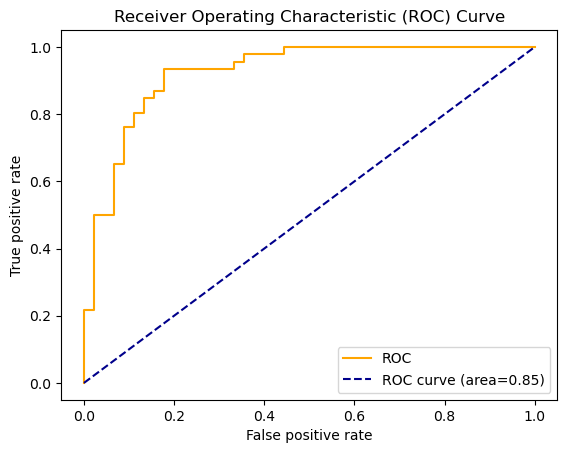

In [55]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.2f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()